# Load Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import seaborn as sns
sns.set()

# Load Data

In [69]:
# Crime Data Chicago city - 2019
url = 'https://data.cityofchicago.org/api/views/w98m-zvie/rows.csv?accessType=DOWNLOAD'
d = pd.read_csv(url)

# Explore Data

In [70]:
d.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,12073144,JD257756,09/11/2019 12:00:00 PM,005XX W OHARE ST,0810,THEFT,OVER $500,AIRPORT EXTERIOR - NON-SECURE AREA,False,False,...,41.0,76,06,NaN,NaN,2019,06/10/2020 03:49:15 PM,NaN,NaN,NaN
1,12069760,JD254591,02/01/2019 09:00:00 AM,003XX W MADISON ST,1140,DECEPTIVE PRACTICE,EMBEZZLEMENT,COMMERCIAL / BUSINESS OFFICE,False,False,...,42.0,32,12,1174225.0,1900337.0,2019,06/10/2020 03:46:57 PM,41.881929,-87.635705,"(41.881928906, -87.635704735)"
2,12069458,JD253908,02/01/2019 12:01:00 AM,057XX N RICHMOND ST,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,OTHER (SPECIFY),False,False,...,40.0,2,26,1155655.0,1937952.0,2019,06/10/2020 03:46:57 PM,41.985541,-87.702878,"(41.985541232, -87.702877826)"
3,12071408,JD256425,12/16/2019 01:00:00 AM,002XX E OHIO ST,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,APARTMENT,False,False,...,42.0,8,17,1177936.0,1904246.0,2019,06/10/2020 03:46:57 PM,41.892572,-87.621959,"(41.892571811, -87.621959165)"
4,12073324,JD258636,10/19/2019 09:00:00 AM,090XX S LAFLIN ST,0820,THEFT,$500 AND UNDER,APARTMENT,False,False,...,21.0,73,06,NaN,NaN,2019,06/10/2020 03:49:15 PM,NaN,NaN,NaN


In [68]:
d.shape

(259135, 22)

In [71]:
d.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

# Data Cleaning

In [72]:
# Selecting the required columns 
data = d.loc[:,['ID', 'Date', 'Primary Type','Description', 'Arrest', 'Domestic','District']]

In [6]:
data.head()

,ID,Date,Primary Type,Description,Arrest,Domestic,District
0,12067918,11/11/2019 02:30:00 AM,ASSAULT,SIMPLE,False,False,17
1,12065556,05/31/2019 12:01:00 AM,BURGLARY,FORCIBLE ENTRY,False,False,25
2,12068114,09/05/2019 01:15:00 PM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,False,False,1
3,12068538,04/10/2019 12:00:00 AM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,False,False,5
4,12065660,04/11/2019 12:01:00 AM,DECEPTIVE PRACTICE,COUNTERFEIT CHECK,False,False,1


In [7]:
# Rename Primary Type column to 'crime_type'

In [73]:
data.rename(columns = {'Primary Type' :'crime_type' }, inplace = True)

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259151 entries, 0 to 259150
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ID           259151 non-null  int64 
 1   Date         259151 non-null  object
 2   crime_type   259151 non-null  object
 3   Description  259151 non-null  object
 4   Arrest       259151 non-null  bool  
 5   Domestic     259151 non-null  bool  
 6   District     259151 non-null  int64 
dtypes: bool(2), int64(2), object(3)
memory usage: 10.4+ MB


In [77]:
# Convert Data column to date fromate

data['Date'] = pd.to_datetime(data.Date)

In [78]:
data.head()

,ID,Date,crime_type,Description,Arrest,Domestic,District
0,12073144,2019-09-11 12:00:00,THEFT,OVER $500,False,False,16
1,12069760,2019-02-01 09:00:00,DECEPTIVE PRACTICE,EMBEZZLEMENT,False,False,1
2,12069458,2019-02-01 00:01:00,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,False,False,20
3,12071408,2019-12-16 01:00:00,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,False,False,18
4,12073324,2019-10-19 09:00:00,THEFT,$500 AND UNDER,False,False,22


In [12]:
# Creating New Variables for;
    # Month
    # Week
    # Hour

In [79]:
#data.Date.dt.month_name
data.Date.dt.month_name()

0         September
1          February
2          February
3          December
4           October
            ...    
259146          May
259147          May
259148          May
259149          May
259150          May
Name: Date, Length: 259151, dtype: object

In [80]:
data['month_number'] = data.Date.dt.month

In [81]:
data['month_name'] = data.Date.dt.month_name()

In [82]:
data['hour'] = data.Date.dt.hour

In [83]:
data['weekday'] = data.Date.dt.weekday

In [84]:
data['dayofyear'] = data.Date.dt.dayofyear

In [85]:
data.head()

,ID,Date,crime_type,Description,Arrest,Domestic,District,month_number,month_name,hour,weekday,dayofyear
0,12073144,2019-09-11 12:00:00,THEFT,OVER $500,False,False,16,9,September,12,2,254
1,12069760,2019-02-01 09:00:00,DECEPTIVE PRACTICE,EMBEZZLEMENT,False,False,1,2,February,9,4,32
2,12069458,2019-02-01 00:01:00,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,False,False,20,2,February,0,4,32
3,12071408,2019-12-16 01:00:00,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,False,False,18,12,December,1,0,350
4,12073324,2019-10-19 09:00:00,THEFT,$500 AND UNDER,False,False,22,10,October,9,5,292


In [86]:
data.shape

(259151, 12)

In [21]:
# Time Difference

In [87]:
# Minimum Date
data.Date.min()

Timestamp('2019-01-01 00:00:00')

In [88]:
# Maximum Date
data.Date.max()

Timestamp('2019-12-31 23:55:00')

In [89]:
# Difference between the min and max time
# This shows the total numbers of day that we have in the Dataset
data.Date.max() - data.Date.min()

Timedelta('364 days 23:55:00')

In [90]:
data.month_name.value_counts

<bound method IndexOpsMixin.value_counts of 0         September
1          February
2          February
3          December
4           October
            ...    
259146          May
259147          May
259148          May
259149          May
259150          May
Name: month_name, Length: 259151, dtype: object>

In [91]:
d5 = data.month_number.value_counts()

In [92]:
d4 = data.month_name.value_counts()

In [93]:
 d6 = pd.DataFrame({'monthno': d5.index, 'month_name': d4.index, 'freq': d4.values })

In [94]:
d6

,monthno,month_name,freq
0,7,July,24709
1,8,August,24149
2,5,May,23551
3,6,June,23464
4,9,September,22246
5,10,October,21490
6,4,April,20947
7,12,December,20542
8,3,March,20370
9,11,November,19738


In [95]:
d6.set_index('monthno', inplace = True)

In [96]:
d6 = d6.sort_values(by = ['monthno']).reset_index(drop = True)

In [97]:
d6

,month_name,freq
0,January,19595
1,February,18350
2,March,20370
3,April,20947
4,May,23551
5,June,23464
6,July,24709
7,August,24149
8,September,22246
9,October,21490


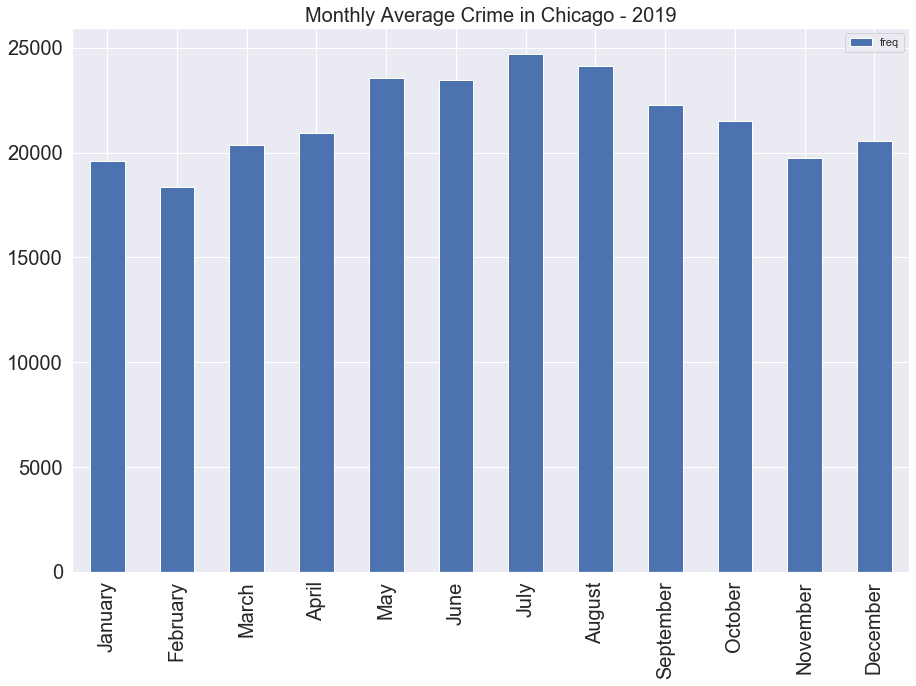

In [98]:
d6.plot(kind = 'bar', figsize = ( 15, 10))
plt.title("Monthly Average Crime in Chicago - 2019", fontsize = 20)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], ['January','February','March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December'])

plt.show()

Text(0.5, 1.0, 'Monthly Crime in Chicago - 2019')

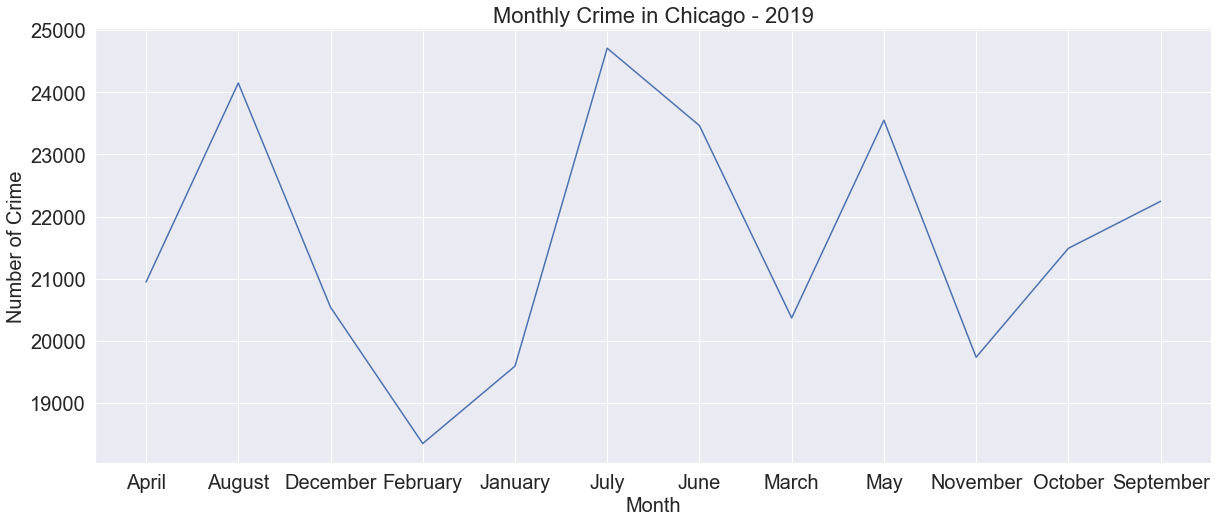

In [99]:
plt.figure(figsize=(20, 8))
plt.rc('ytick', labelsize=20)
plt.rc('xtick', labelsize=20)
sns.lineplot(x="month_name",y="freq",data = d6)
plt.xlabel('Month', fontsize = 20)
plt.ylabel('Number of Crime', fontsize = 20)
plt.title('Monthly Crime in Chicago - 2019', fontsize = 22)

# Crime in Each days of year

In [100]:
a = np.arange(start=1, stop=365, step=19)

In [101]:
a

array([  1,  20,  39,  58,  77,  96, 115, 134, 153, 172, 191, 210, 229,
       248, 267, 286, 305, 324, 343, 362])

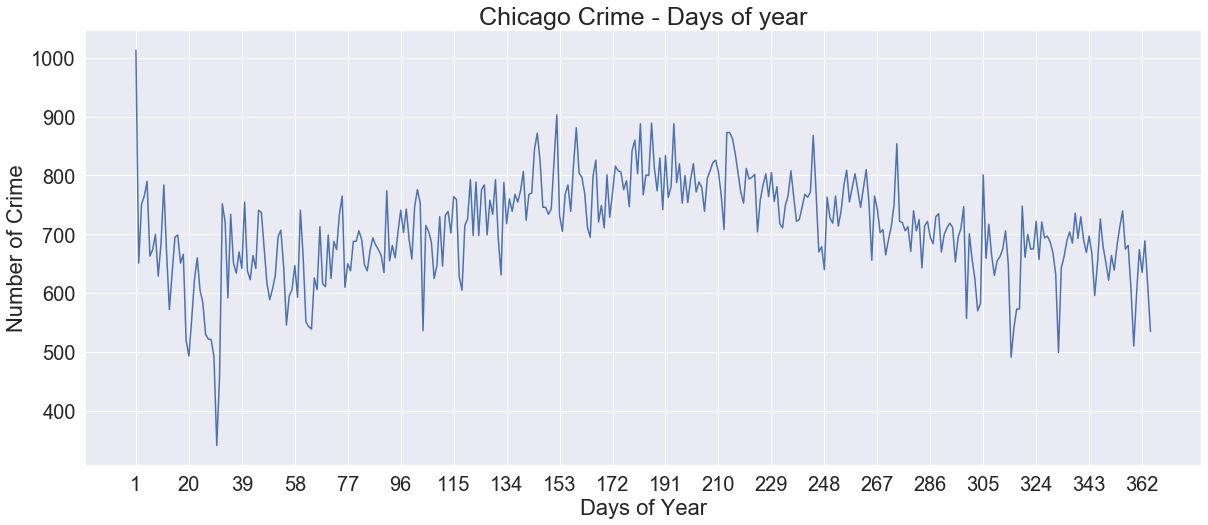

In [102]:
data.dayofyear.value_counts().sort_index().plot(figsize = (20,8))
plt.title("Chicago Crime - Days of year", fontsize = 25)
plt.xlabel('Days of Year', fontsize = 22)
plt.ylabel('Number of Crime', fontsize = 22)
plt.xticks(a)
plt.show()

In [103]:
crime_day = data.dayofyear

In [104]:
crime_day.head()

0    254
1     32
2     32
3    350
4    292
Name: dayofyear, dtype: int64

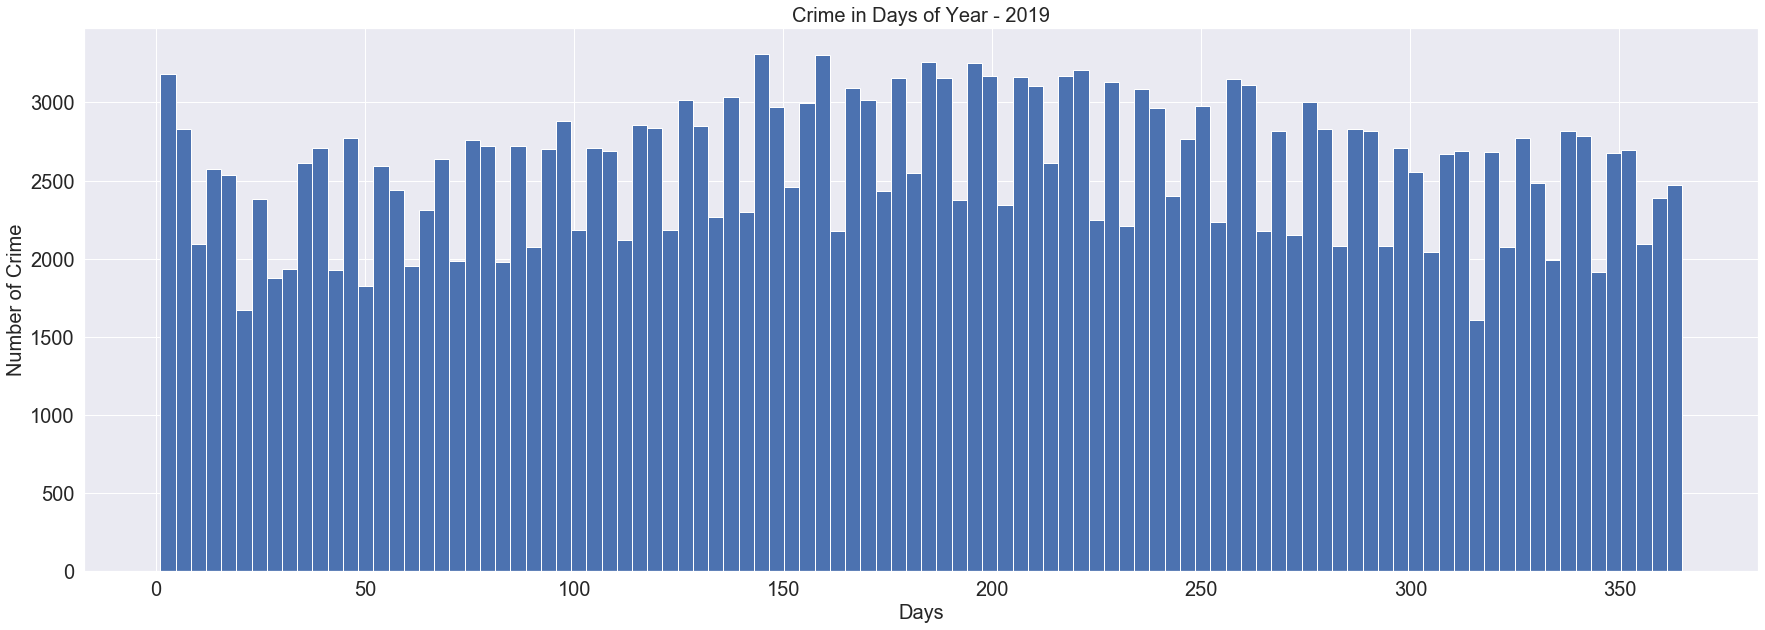

In [107]:
plt.figure(figsize = (30, 10))
plt.hist(crime_day, bins = 100)
plt.title('Crime in Days of Year - 2019', fontsize = 20)
plt.xlabel('Days', fontsize = 20)
plt.ylabel('Number of Crime', fontsize = 20)
plt.show()

# Type of Crime in 2019 - Overall

In [44]:
data.crime_type.value_counts()

THEFT                                62378
BATTERY                              49486
CRIMINAL DAMAGE                      26669
ASSAULT                              20607
DECEPTIVE PRACTICE                   18302
OTHER OFFENSE                        16690
NARCOTICS                            14220
BURGLARY                              9627
MOTOR VEHICLE THEFT                   8981
ROBBERY                               7987
CRIMINAL TRESPASS                     6817
WEAPONS VIOLATION                     6325
OFFENSE INVOLVING CHILDREN            2289
INTERFERENCE WITH PUBLIC OFFICER      1546
PUBLIC PEACE VIOLATION                1520
SEX OFFENSE                           1294
CRIM SEXUAL ASSAULT                   1281
PROSTITUTION                           680
HOMICIDE                               503
ARSON                                  378
CRIMINAL SEXUAL ASSAULT                317
LIQUOR LAW VIOLATION                   230
STALKING                               222
CONCEALED C

In [ ]:
# Graph of Crime type

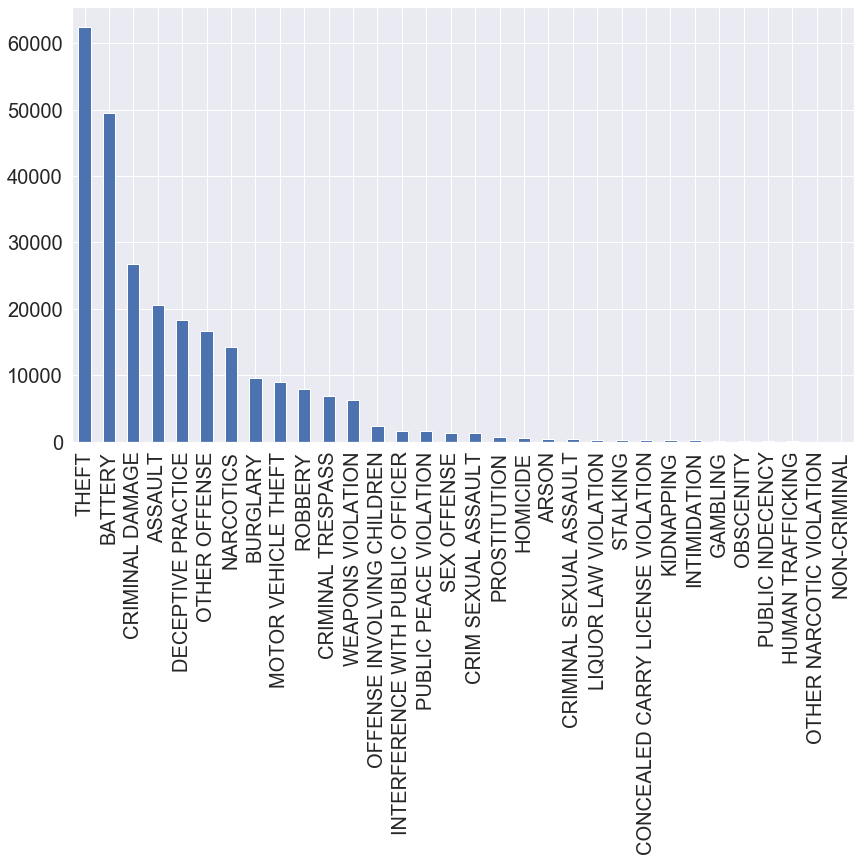

In [45]:
plt.figure(figsize=(14, 8))
data.crime_type.value_counts().plot(kind = 'bar')

# 10 Most Common Crime

In [114]:
most_common = data.crime_type.value_counts()[:10]

<Figure size 864x720 with 0 Axes>

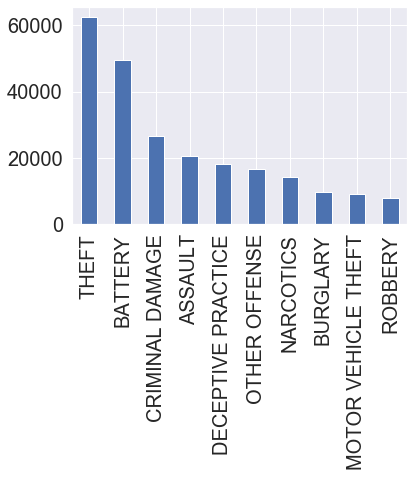

<Figure size 864x720 with 0 Axes>

In [129]:
most_common.plot(kind = 'bar')

# 10 Most Common Crime Each Month

In [130]:
data_sub = data[['crime_type', 'month_number']]

In [131]:
data_sub = data_sub.groupby(['month_number', 'crime_type']).size()

In [132]:
data_sub = data_sub.reset_index()
data_sub.columns = ['month_number', 'crime_type', 'size']

In [133]:
data_sub.sort_values(['month_number', 'size'], ascending = [True, False])

,month_number,crime_type,size
28,1,THEFT,4554
2,1,BATTERY,3519
6,1,CRIMINAL DAMAGE,1795
9,1,DECEPTIVE PRACTICE,1533
1,1,ASSAULT,1458
...,...,...,...
342,12,LIQUOR LAW VIOLATION,6
345,12,OBSCENITY,5
337,12,GAMBLING,2
347,12,OTHER NARCOTIC VIOLATION,1


# Average Crime per Month

In [ ]:
# How to Find the average rate of each type of crime per day - week and month?